Dados originais:
         Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  05/04/2004  16.00.00     2.0       1273.0     245.0       9.6   
1  25/03/2004  17.00.00     2.0       1102.0     143.0       9.4   
2  25/03/2004  02.00.00     0.7        902.0      38.0       1.8   
3  11/04/2004  08.00.00     1.1        912.0      88.0       3.7   
4  30/04/2004  06.00.00     1.7       1206.0     111.0       9.3   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0          963.0     98.0         832.0     82.0        1662.0        931.0   
1          957.0    120.0         968.0     88.0        1527.0        820.0   
2          568.0     38.0        1450.0     54.0        1253.0        479.0   
3          694.0     61.0        1196.0     58.0        1343.0        727.0   
4          949.0    162.0         818.0     90.0        1771.0       1116.0   

      T    RH      AH  
0  22.2  38.3  1.0106  
1  17.1  37.4  0.7225  
2   9.1  68.1  0.7890  
3  

C:\Users\jairo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


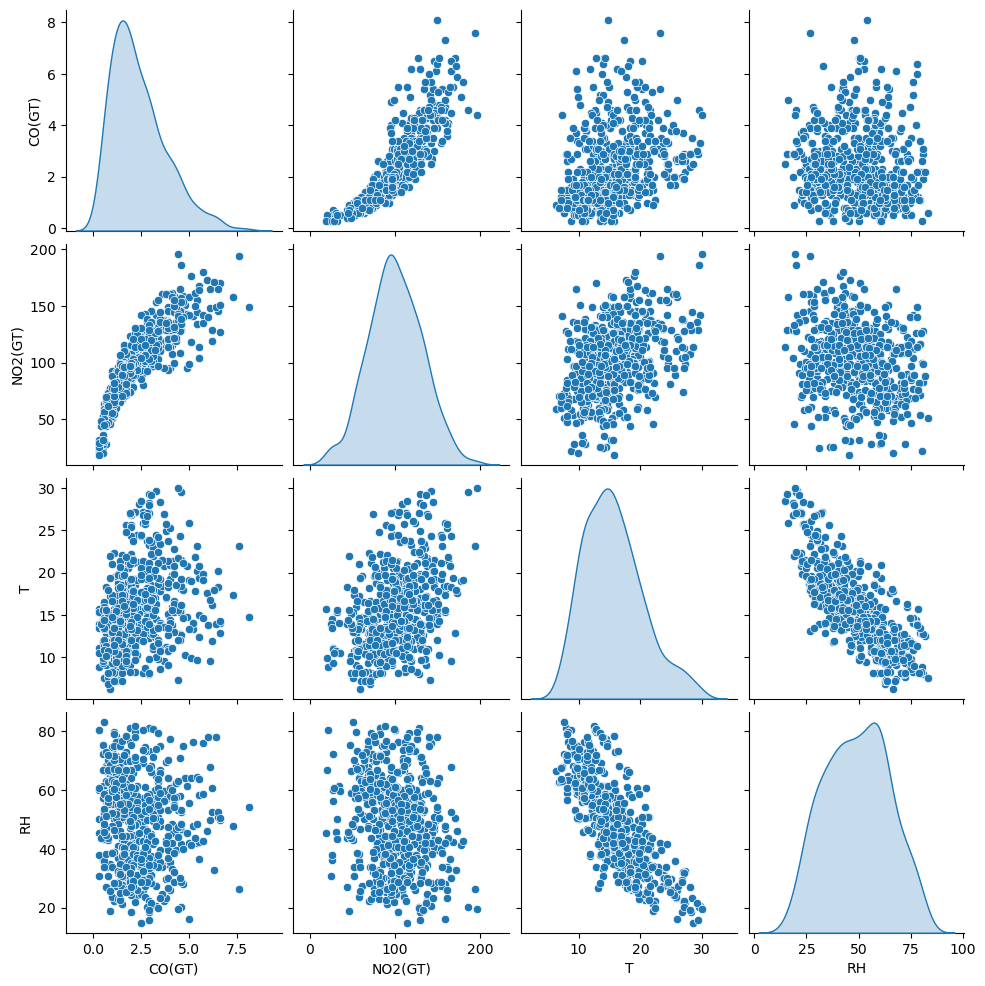


Dados embaralhados:
         Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  24/03/2004  20.00.00     3.5       1273.0     458.0      14.4   
1  15/03/2004  09.00.00     8.1       1961.0     618.0      36.7   
2  26/03/2004  12.00.00     2.0       1099.0     181.0      11.0   
3  14/03/2004  00.00.00     2.9       1534.0      93.0      11.0   
4  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1130.0    190.0         795.0    136.0        1744.0       1071.0   
1         1701.0    478.0         537.0    149.0        2665.0       2184.0   
2         1014.0    112.0         948.0     97.0        1503.0        868.0   
3         1013.0    190.0         889.0    129.0        1611.0       1535.0   
4          955.0    103.0        1174.0     92.0        1559.0        972.0   

      T    RH      AH  
0  10.8  65.7  0.8486  
1  14.8  54.3  0.9076  
2  19.2  27.1  0.5976  

C:\Users\jairo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


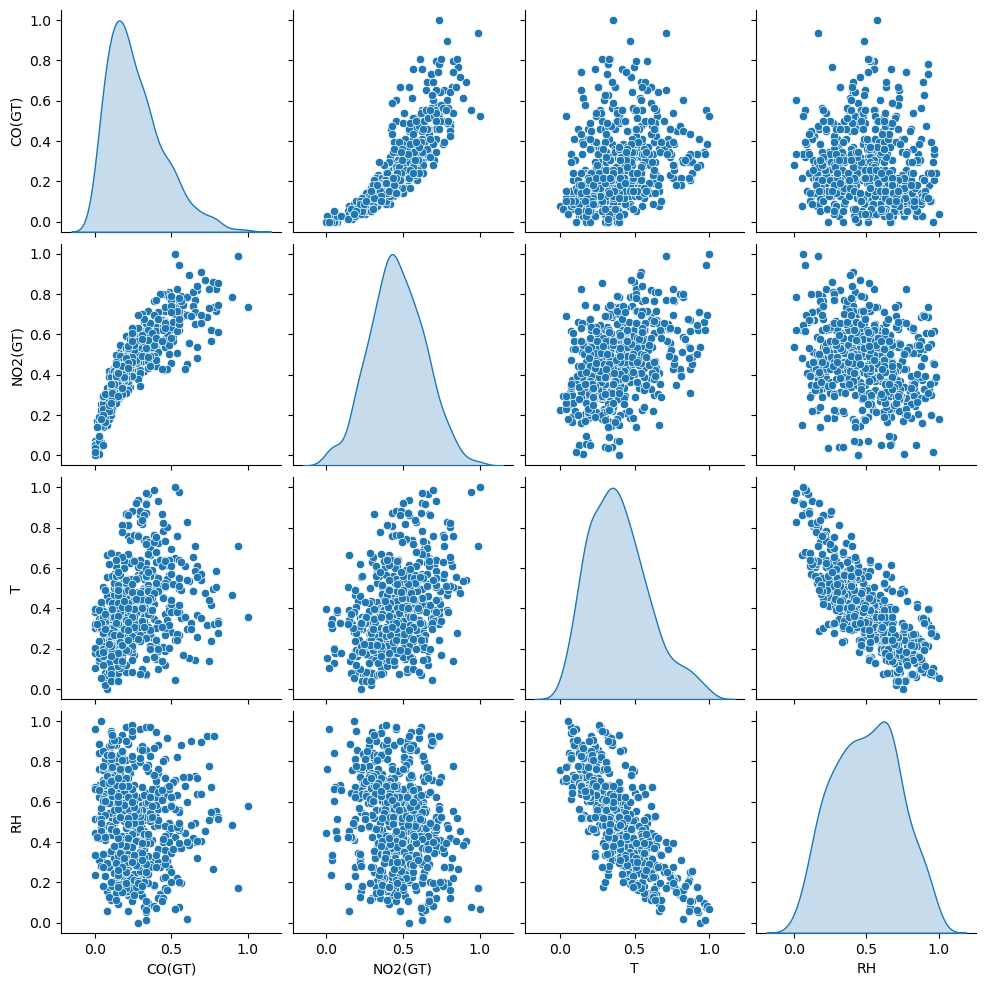


Distribuição dos dados após normalização (-1 a 1):


C:\Users\jairo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


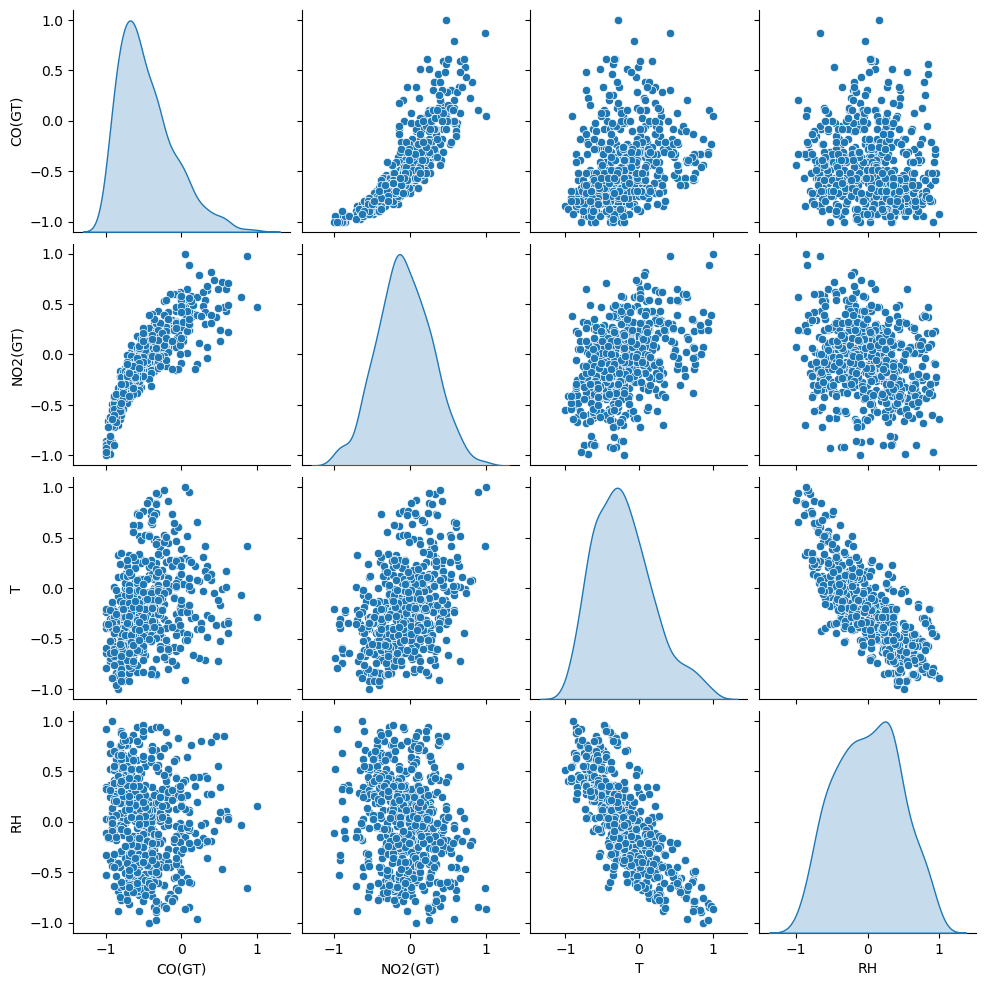


Dados de treino e teste:
X_train: (462, 13)
X_test: (116, 13)
y_train: (462,)
y_test: (116,)


In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
df = pd.read_csv('AirQuality_train.csv')
print("Dados originais:")
print(df.head())

# Plotar algumas distribuições originais
sns.pairplot(df[['CO(GT)', 'NO2(GT)', 'T', 'RH']].dropna(), diag_kind='kde')
plt.show()

# Embaralhar os dados
df = df.sample(frac=1).reset_index(drop=True)
print("\nDados embaralhados:")
print(df.head())

# Normalização entre 0 e 1
scaler_0_1 = MinMaxScaler(feature_range=(0, 1))
scaled_data_0_1 = scaler_0_1.fit_transform(df[df.columns.difference(['Date', 'Time'])])
df_scaled_0_1 = pd.DataFrame(scaled_data_0_1, columns=df.columns.difference(['Date', 'Time']))

# Normalização entre -1 e 1
scaler_neg1_1 = MinMaxScaler(feature_range=(-1, 1))
scaled_data_neg1_1 = scaler_neg1_1.fit_transform(df[df.columns.difference(['Date', 'Time'])])
df_scaled_neg1_1 = pd.DataFrame(scaled_data_neg1_1, columns=df.columns.difference(['Date', 'Time']))

# Plotar algumas distribuições após a normalização
print("\nDistribuição dos dados após normalização (0 a 1):")
sns.pairplot(df_scaled_0_1[['CO(GT)', 'NO2(GT)', 'T', 'RH']].dropna(), diag_kind='kde')
plt.show()

print("\nDistribuição dos dados após normalização (-1 a 1):")
sns.pairplot(df_scaled_neg1_1[['CO(GT)', 'NO2(GT)', 'T', 'RH']].dropna(), diag_kind='kde')
plt.show()

# Preparar os dados para a validação cruzada
X = df_scaled_0_1
y = df['CO(GT)']  # Assumindo CO(GT) como a variável alvo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nDados de treino e teste:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


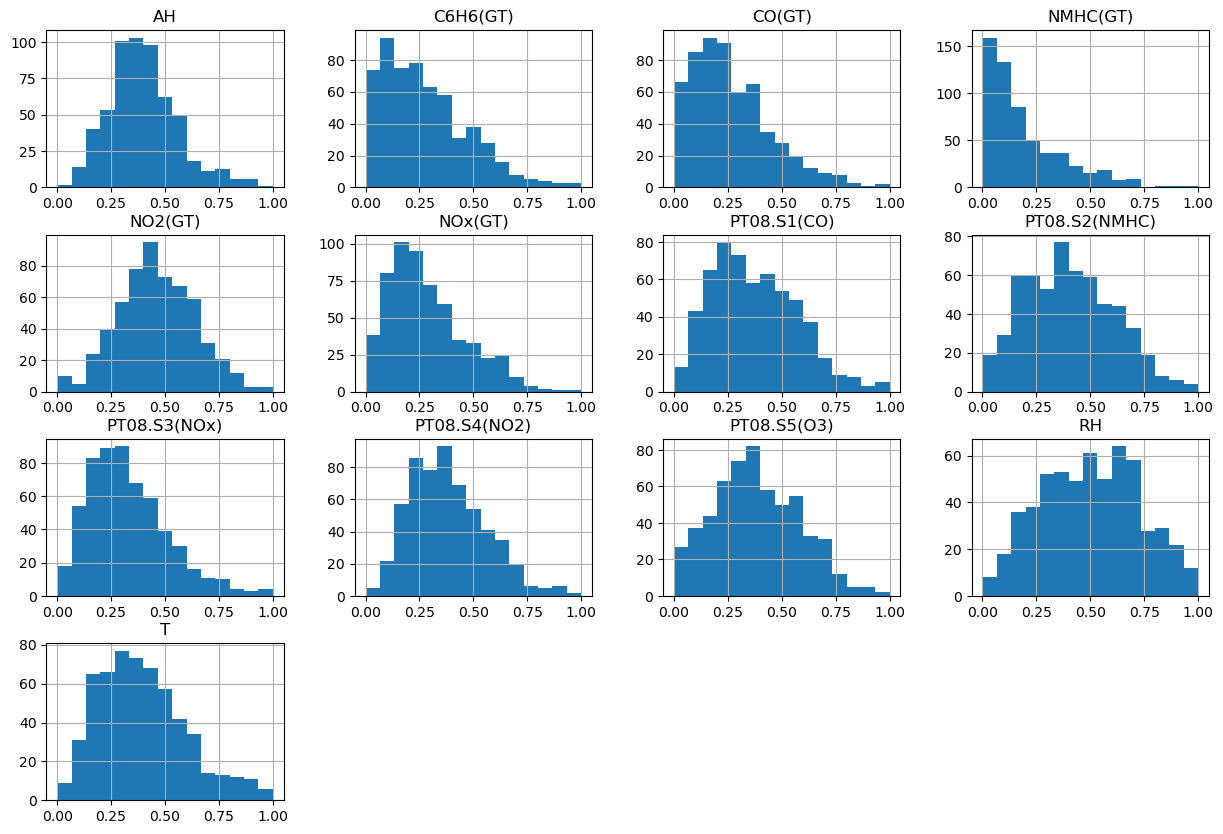

               AH    C6H6(GT)      CO(GT)    NMHC(GT)     NO2(GT)     NOx(GT)  \
count  578.000000  578.000000  578.000000  578.000000  578.000000  578.000000   
mean     0.399891    0.275625    0.267434    0.193663    0.460217    0.286102   
std      0.161903    0.195242    0.181991    0.176969    0.176507    0.177205   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.297488    0.121372    0.128205    0.060119    0.338983    0.156652   
50%      0.388494    0.233509    0.217949    0.131245    0.451977    0.246781   
75%      0.480954    0.387863    0.358974    0.274344    0.581921    0.381974   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       PT08.S1(CO)  PT08.S2(NMHC)  PT08.S3(NOx)  PT08.S4(NO2)  PT08.S5(O3)  \
count   578.000000     578.000000    578.000000    578.000000   578.000000   
mean      0.375254       0.407041      0.327440      0.382274     0.384738   
std       0.196857       0.206918   

In [4]:
# Plotando histogramas dos dados normalizados
df_scaled_0_1.hist(bins=15, figsize=(15, 10))
plt.show()

# Imprimindo estatísticas dos dados normalizados
print(df_scaled_0_1.describe())

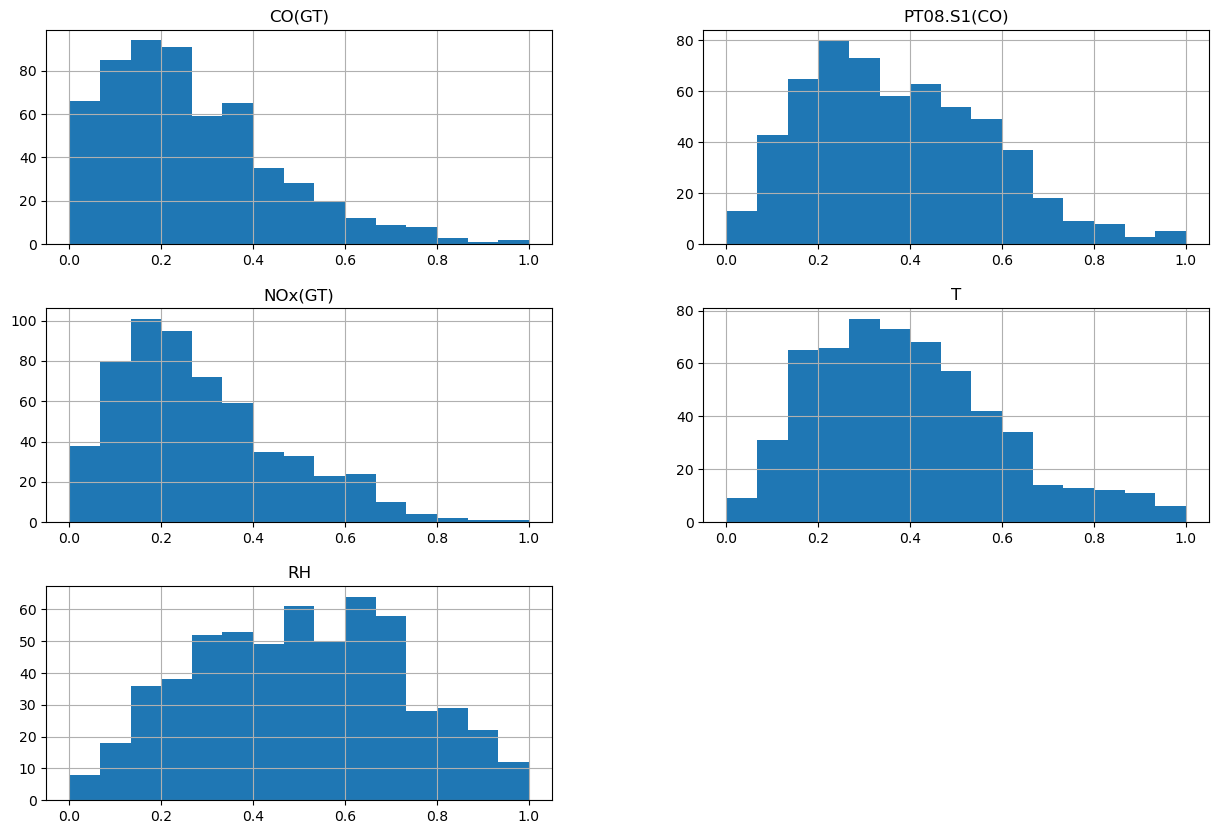

In [5]:
# Selecionando as colunas desejadas
selected_columns = ['CO(GT)', 'PT08.S1(CO)', 'NOx(GT)', 'T', 'RH']
df_selected = df_scaled_0_1[selected_columns]

# Plotando histogramas das colunas selecionadas
df_selected.hist(bins=15, figsize=(15, 10))
plt.show()

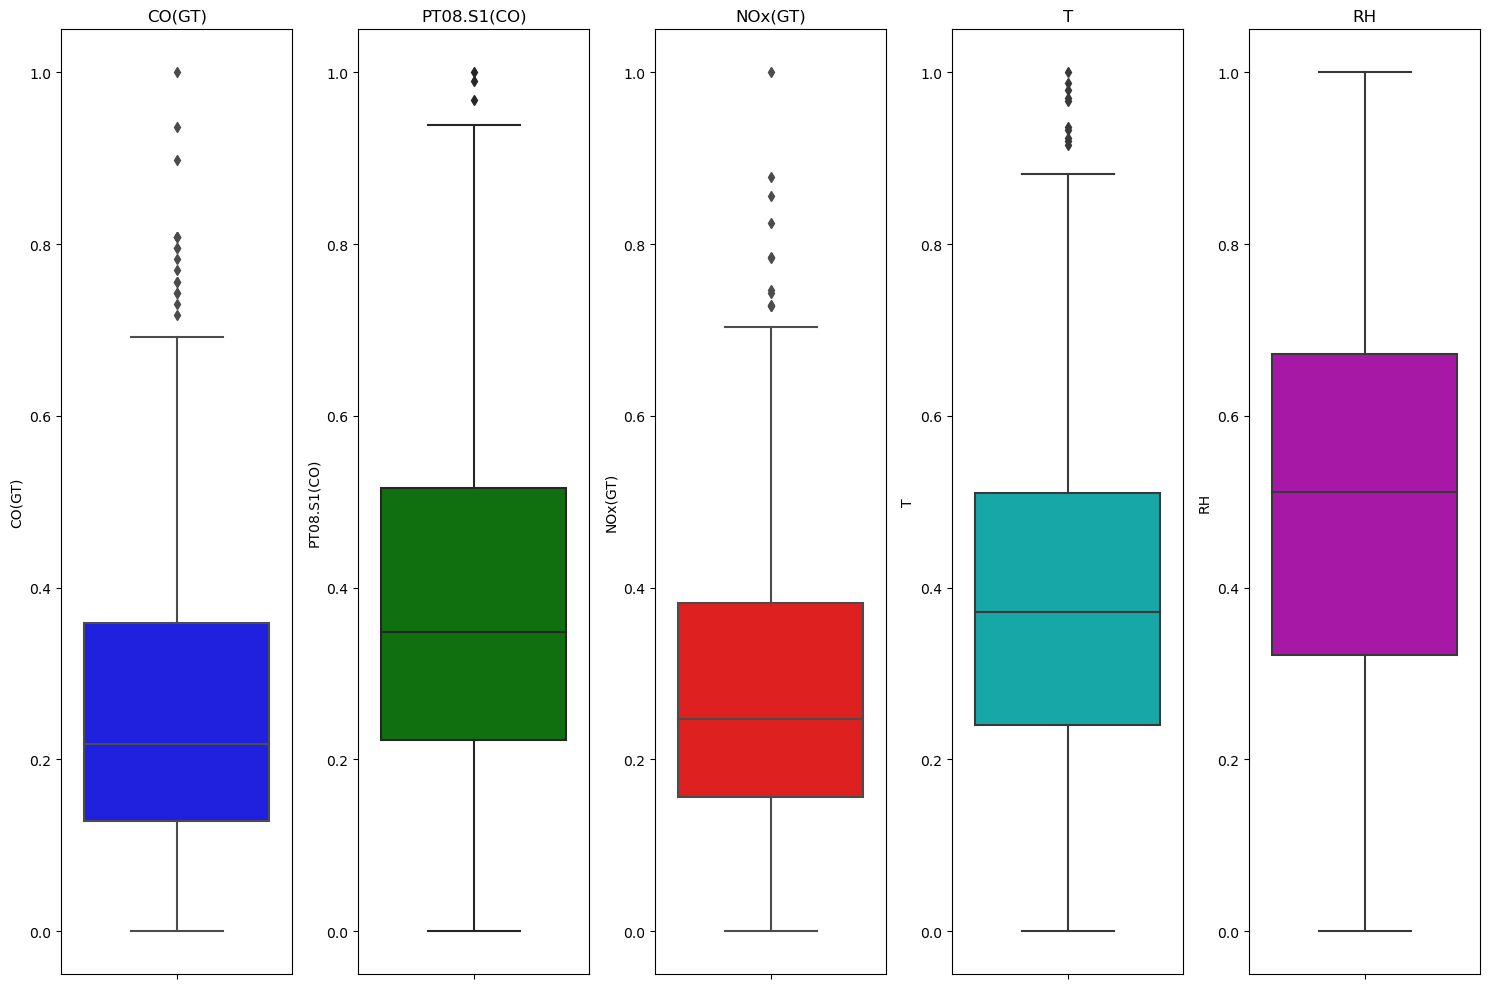

In [7]:
# Selecionando as colunas desejadas
selected_columns = ['CO(GT)', 'PT08.S1(CO)', 'NOx(GT)', 'T', 'RH']
df_selected = df_scaled_0_1[selected_columns]

# Definindo as cores
colors = ['b', 'g', 'r', 'c', 'm']

# Criando a figura e os eixos
fig, axs = plt.subplots(1, len(selected_columns), figsize=(15, 10))

# Loop sobre as colunas selecionadas
for i, column in enumerate(selected_columns):
    # Plotando o boxplot para a coluna atual
    sns.boxplot(y=df_selected[column], color=colors[i], ax=axs[i])
    axs[i].set_title(column)

# Mostrando a figura
plt.tight_layout()
plt.show()